In [24]:
import pyscf
from pyscf.tools import cubegen
import matplotlib.pyplot as plt
import numpy as np

mol = pyscf.gto.M(
    atom="H 0. 0. 0.; H 0. 0. 0.9", 
    basis='ccpvtz',
    )

mf = pyscf.scf.RHF(mol)
mf.kernel()

converged SCF energy = -1.11872707612858


-1.1187270761285808

In [25]:
mf.mo_energy

array([-0.55005221,  0.1422164 ,  0.31954805,  0.58159592,  0.67794779,
        0.67794779,  1.04553215,  1.08744919,  1.08744919,  1.49239846,
        2.46820598,  2.48151341,  3.18067204,  3.18067204,  3.30237876,
        3.30237876,  3.56802723,  3.91887087,  3.91887087,  3.98514977,
        3.98514977,  3.990921  ,  3.990921  ,  4.22259713,  5.18715844,
        5.18715844,  5.23523886,  6.42431018])

In [32]:
def plot_density(density):
    plt.figure(figsize=(8,8))
    range = np.max(np.abs(density))
    cm = plt.imshow(density[density.shape[0]//2,:,:], cmap='bwr',vmin=-range, vmax=range)
    plt.colorbar()


def plot_density_line(density):
    plt.figure(figsize=(8,8))
    cm = plt.plot(np.arange(density.shape[2]), density[density.shape[0]//2,density.shape[1]//2,:])
    

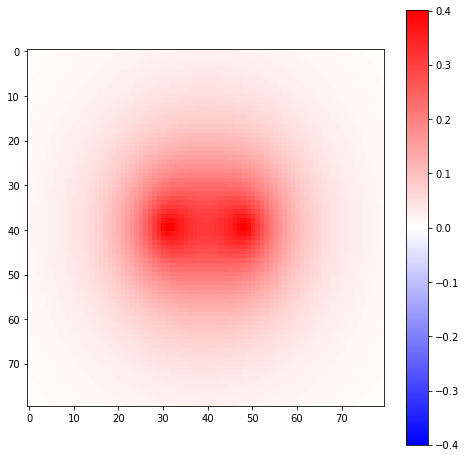

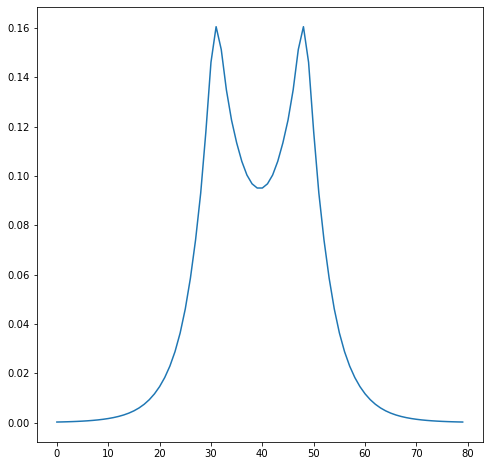

In [40]:
density = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,0])
plot_density(density)
plot_density_line(density**2)

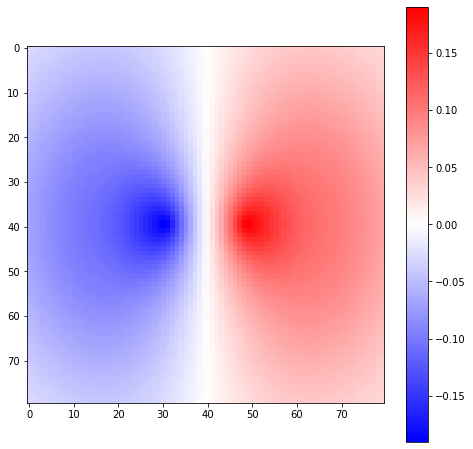

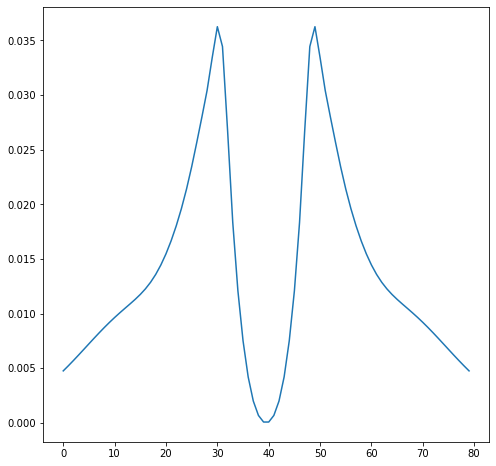

In [37]:
density = cubegen.orbital(mol, 'mo1.cube', mf.mo_coeff[:,1])
plot_density(density)
plot_density_line(density**2)

$$
H_{eff} = |\Phi_0\rangle \epsilon_0 \langle \Phi_0| + |\Phi_1\rangle \epsilon_1 \langle \Phi_1|
$$

This is equivalent to 
$$
H_{eff} = \begin{matrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{matrix} 
$$

Written in the molecular orbital basis.

We eventually would like to write our effective Hamiltonian in a localized basis, which would correspond to 'sites.'

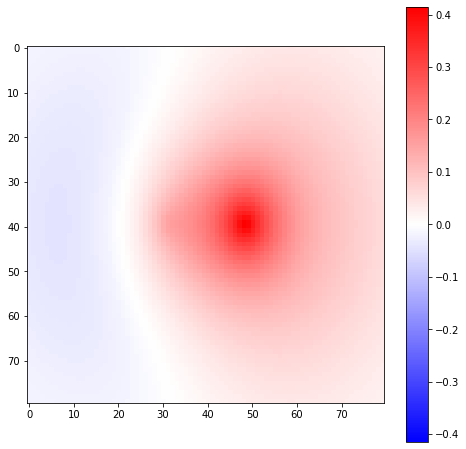

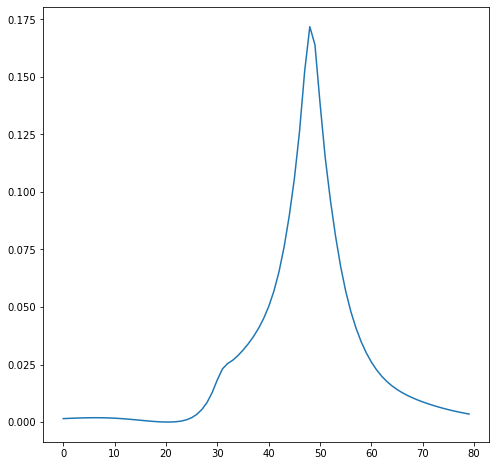

In [38]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]+mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density**2)

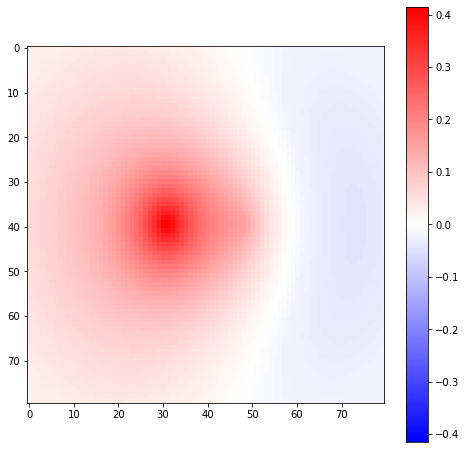

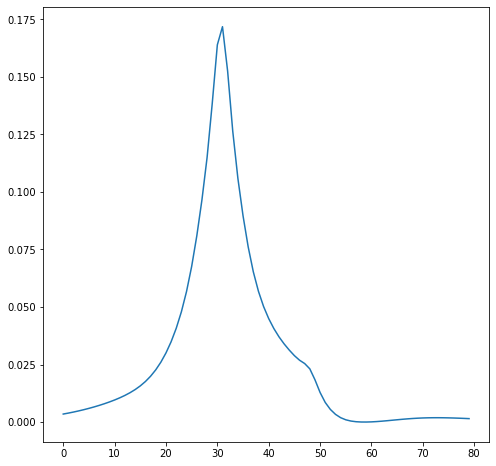

In [39]:
density = cubegen.orbital(mol, 'mo1.cube', (mf.mo_coeff[:,0]-mf.mo_coeff[:,1])/np.sqrt(2))
plot_density(density)
plot_density_line(density**2)

Now we have basis functions that at least approximately correspond to sites. 

Question: what is the Hamiltonian in the new basis? Rotation operator is:
$$
U = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$

$H$ in the new basis is 
$$
UHU^\dagger = \frac{1}{2} \begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
\begin{bmatrix}
\epsilon_0 & 0 \\
0 & \epsilon_1 \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix} 
$$


In [51]:
R = np.array([[1,1],[1,-1]])/np.sqrt(2)
H = np.array([[mf.mo_energy[0],0],[0,mf.mo_energy[1]]])
H_tb = np.einsum("ij,jk,kl->il", R,H,R)
print(H_tb*27.2114)

[[-5.54889167 -9.41879897]
 [-9.41879897 -5.54889167]]


In [49]:
w,v = np.linalg.eigh(H_tb)
print(w)
print(v)

[-0.55005221  0.1422164 ]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
